In [9]:
import pandas as pd
import numpy as np 
from numpy import loadtxt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, auc, recall_score, precision_score, roc_curve, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, classification_report
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [10]:
ti = pd.read_csv('travel.insurance.csv')

In [11]:
ti.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [12]:
ti.shape

(63326, 11)

In [13]:
ti.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [14]:
ti_1 = ti.dropna()

In [15]:
ti_2 = pd.get_dummies(ti_1,drop_first = True)

In [16]:
ti_2.std()

Duration                                       112.977561
Net Sales                                       73.884899
Commision (in value)                            24.963075
Age                                             20.894323
Agency_ART                                       0.132568
Agency_C2B                                       0.497871
Agency_CBH                                       0.074251
Agency_CCR                                       0.102380
Agency_CSR                                       0.068544
Agency_CWT                                       0.016564
Agency_JWT                                       0.196382
Agency_JZI                                       0.475030
Agency_KML                                       0.145101
Agency_LWC                                       0.190760
Agency_RAB                                       0.164169
Agency_TST                                       0.167448
Agency_TTW                                       0.073146
Agency Type_Tr

In [17]:
ti_2.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_THAILAND,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VIET NAM,Gender_M
0,186,-29.0,9.57,81,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,-29.0,9.57,71,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,66,-121.0,42.35,44,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11,1,-18.0,6.30,47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,53,-130.0,49.40,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
categorical_var = list(set(ti_1.dtypes[ti_1.dtypes == object].index) - set(['Claim']))

In [19]:
list(set(ti_1.dtypes[ti_1.dtypes == 'object'].index) - set(['Claim']))

['Agency',
 'Distribution Channel',
 'Destination',
 'Agency Type',
 'Gender',
 'Product Name']

In [20]:
set(ti_1.columns) - set(ti_1.select_dtypes('object').columns)

{'Age', 'Commision (in value)', 'Duration', 'Net Sales'}

In [21]:
numerical_val = list(set(ti_1.columns) - set(ti_1.dtypes[ti_1.dtypes == object].index))

In [22]:
X=ti_2.drop("Gender_M",axis=1)
y = ti_2["Gender_M"]

In [23]:
ti_2.shape

(18219, 123)

In [24]:
ti_2.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_THAILAND,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VIET NAM,Gender_M
0,186,-29.0,9.57,81,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,-29.0,9.57,71,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,66,-121.0,42.35,44,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11,1,-18.0,6.30,47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,53,-130.0,49.40,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression

In [25]:
seed = 7
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [26]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

C:\Users\theot\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


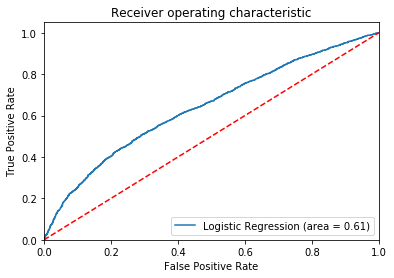

In [27]:
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [28]:
accuracy = accuracy_score(y_test, predictions)

fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=1)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("AUC: ", auc(fpr, tpr))

Accuracy: 60.14%
AUC:  0.6060774281526659


In [29]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [30]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

In [31]:
import time 
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

C:\Users\theot\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best: 0.599594 using {'C': 1.5, 'dual': False, 'max_iter': 100}
Execution time: 15.890868663787842 ms


In [32]:
logmodel1 = LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
logmodel1.fit(X_train,y_train) 

C:\Users\theot\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
predictions_log1=logmodel1.predict(X_test)

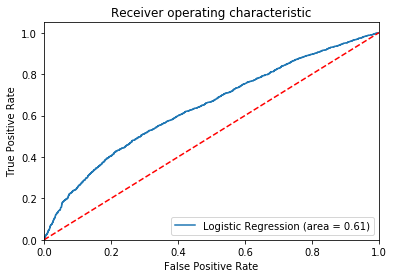

In [34]:
logit_roc_auc = roc_auc_score(y_test, logmodel1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [35]:
accuracy = accuracy_score(y_test, predictions_log1)

fpr, tpr, thresholds = roc_curve(y_test, predictions_log1, pos_label=1)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("AUC: ", auc(fpr, tpr))

Accuracy: 60.15%
AUC:  0.6062516441805404


# Random Forest

In [36]:
features = list(ti_2.drop("Gender_M",axis=1))

In [37]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
rfc_pred = rfc.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, rfc_pred)

fpr, tpr, thresholds = roc_curve(y_test, rfc_pred, pos_label=1)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("AUC: ", auc(fpr, tpr))

Accuracy: 57.76%
AUC:  0.5775819674331456


In [40]:
model=RandomForestClassifier()
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3,4,5],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)

C:\Users\theot\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}


In [41]:
rfc2 = RandomForestClassifier( criterion='gini',
                       min_samples_leaf=5, min_samples_split=3,
                       n_estimators=30,
                       n_jobs=-1,  random_state=123)
rfc2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [42]:
rfc_pred2 = rfc2.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, rfc_pred2)

fpr, tpr, thresholds = roc_curve(y_test, rfc_pred2, pos_label=1)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("AUC: ", auc(fpr, tpr))

Accuracy: 61.07%
AUC:  0.6104390029152328


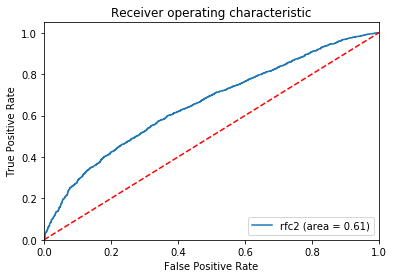

In [44]:
rfc2_roc_auc = roc_auc_score(y_test, rfc2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='rfc2 (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('rfc_ROC')
plt.show()

# Decision Trees

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [46]:
dtree = DecisionTreeClassifier()

In [47]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
predictions_dtree = dtree.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, predictions_dtree)

fpr, tpr, thresholds = roc_curve(y_test, predictions_dtree, pos_label=1)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("AUC: ", auc(fpr, tpr))

Accuracy: 55.27%
AUC:  0.552785308944879


In [50]:
model= DecisionTreeClassifier(random_state=1234)
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
model1.fit(X_train, y_train)
print("Best Hyper Parameters:",model1.best_params_)

C:\Users\theot\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 14, 'random_state': 123}


In [51]:
dtree1 = DecisionTreeClassifier(
                       max_features='auto',
                       min_samples_leaf=6, min_samples_split=14,
                       min_weight_fraction_leaf=0.0,
                       random_state=123)

In [52]:
dtree1.fit(X_train,y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [53]:
predictions_dt = dtree1.predict(X_test)

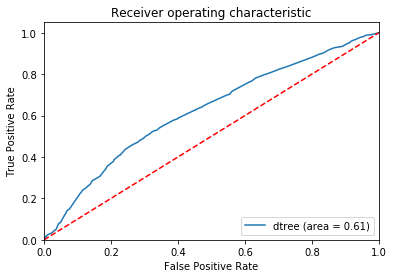

In [54]:
dtree_roc_auc = roc_auc_score(y_test, dtree1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='dtree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('dtree2_ROC')
plt.show()

In [55]:
accuracy = accuracy_score(y_test, predictions_dt)

fpr, tpr, thresholds = roc_curve(y_test, predictions_dt, pos_label=1)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("AUC: ", auc(fpr, tpr))



Accuracy: 59.53%
AUC:  0.5977355942940895


# XGBOOST

In [56]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [57]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [58]:
y_pred_X = model.predict(X_test)

predictions = [round(value) for value in y_pred_X]

In [59]:
accuracy = accuracy_score(y_test, y_pred_X)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_X, pos_label=1)
print("AUC: ", auc(fpr, tpr))

Accuracy: 60.92%
AUC:  0.6129067354526327


In [60]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.426576
[1]	validation_0-error:0.425911
[2]	validation_0-error:0.419757
[3]	validation_0-error:0.407783
[4]	validation_0-error:0.411941
[5]	validation_0-error:0.414768
[6]	validation_0-error:0.411941
[7]	validation_0-error:0.411442
[8]	validation_0-error:0.41061
[9]	validation_0-error:0.410943
[10]	validation_0-error:0.410444
[11]	validation_0-error:0.409613
[12]	validation_0-error:0.411109
[13]	validation_0-error:0.412273
[14]	validation_0-error:0.409613
[15]	validation_0-error:0.406785
[16]	validation_0-error:0.40612
[17]	validation_0-error:0.403792
[18]	validation_0-error:0.403625
[19]	validation_0-error:0.402628
[20]	validation_0-error:0.402628
[21]	validation_0-error:0.402129
[22]	validation_0-error:0.402129
[23]	validation_0-error:0.398636
[24]	validation_0-error:0.39847
[25]	validation_0-error:0.397971
[26]	validation_0-error:0.39714
[27]	validation_0-error:0.396142
[28]	validation_0-error:0.395809
[29]	validation_0-error:0.395809
[30]	validation_0-error:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [61]:
print(model.feature_importances_)

[0.02759823 0.01650284 0.01641925 0.02205891 0.02076498 0.14438957
 0.         0.00803398 0.00679676 0.         0.         0.02915733
 0.03564903 0.01379477 0.0274369  0.         0.         0.07850103
 0.02706413 0.         0.         0.         0.         0.
 0.05630419 0.01979608 0.         0.03772906 0.01178643 0.
 0.00512769 0.         0.01326549 0.         0.         0.00866951
 0.00577392 0.         0.         0.05574917 0.         0.
 0.         0.         0.         0.         0.00410721 0.
 0.         0.         0.         0.01541366 0.         0.00902516
 0.         0.02906898 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00428992 0.         0.01202423 0.         0.         0.01898436
 0.         0.00357676 0.         0.         0.0033796  0.
 0.         0.00951912 0.         0.         0.         0.00237091
 0.         0.         0.         0.         0.         0.
 0.01328646 0.         0.         0.         0.         0.0

In [62]:
n_estimators = range(50,250,25)
max_depth = range(2,10)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
result = grid_search.fit(X_test, y_test)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 10.0min finished


In [63]:
result.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [64]:
model2 = XGBClassifier(n_estimators=100,max_depth=3)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
predictions2 = [round(value) for value in y_pred2]

accuracy = accuracy_score(y_test, predictions2)

fpr, tpr, thresholds = roc_curve(y_test, predictions2, pos_label=1)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("AUC: ", auc(fpr, tpr))

Accuracy: 60.92%
AUC:  0.6129067354526327


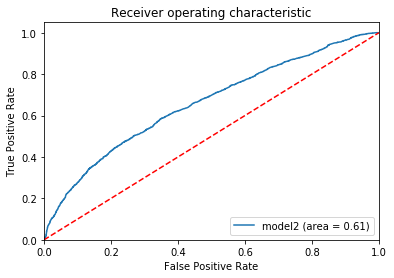

In [65]:
XG_roc_auc = roc_auc_score(y_test, model2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='model2 (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XG_ROC')
plt.show()

# ANN

In [66]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [67]:
ann_model = MLPClassifier(hidden_layer_sizes=(100, 2), random_state=1) 

ann_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [68]:
y_pred = ann_model.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print("AUC: ", auc(fpr, tpr))

Accuracy: 59.65%
AUC:  0.5946782696797107


In [70]:
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

ann2 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
ann2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=100,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alph

In [71]:
y_pred2 = ann2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

fpr, tpr, thresholds = roc_curve(y_test, y_pred2, pos_label=1)
print("AUC: ", auc(fpr, tpr))

Accuracy: 59.67%
AUC:  0.6034649969738017


In [72]:
print('Best parameters found:\n', ann2.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [73]:
scaler = preprocessing.MinMaxScaler().fit(X_train)

x_scaled = scaler.transform(X_train)

In [74]:
print(X_train[0:])
print(x_scaled[0:])

       Duration  Net Sales  Commision (in value)  Age  Agency_ART  Agency_C2B  \
48443        12      62.00                 15.50   34           0           1   
26048        13      61.10                 15.28   55           0           1   
10157        17      30.00                 10.50   38           0           0   
54172        12      20.00                  5.00   28           0           1   
49917        13       0.00                 11.88   43           0           1   
1740        171      30.00                 10.50   48           0           0   
36564        23      13.50                  3.38   30           0           1   
39494        38      42.00                 10.50   27           0           1   
57307        20      26.00                  9.10   60           0           0   
23108       365     252.85                 63.21   30           0           1   
33410         9      17.00                  4.25   35           0           1   
28473        33      63.00  

In [75]:
parameter_space = {
    'hidden_layer_sizes': [50,50,50],
    'activation': ['tanh'],
    'solver': ['sgd'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
}


ann3 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
ann3.fit(x_scaled, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=100,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.0001],


In [76]:
y_pred3 = ann3.predict(scaler.transform(X_test))

accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

fpr, tpr, thresholds = roc_curve(y_test, y_pred3, pos_label=1)
print("AUC: ", auc(fpr, tpr))

Accuracy: 60.20%
AUC:  0.6065183533934435


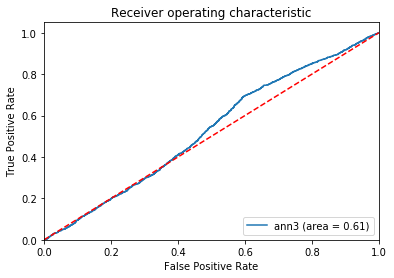

In [77]:
ANN_roc_auc = roc_auc_score(y_test, ann3.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, ann3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ann3 (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

In [78]:
permImportance = PermutationImportance(rfc2, random_state=101).fit(X,y)

In [100]:
Weight = eli5.show_weights(permImportance, feature_names = ti_2.drop("Gender_M", axis=1).columns.tolist())
Weight

Weight,Feature
0.0634 ± 0.0033,Duration
0.0617 ± 0.0027,Age
0.0406 ± 0.0028,Net Sales
0.0366 ± 0.0039,Commision (in value)
0.0148 ± 0.0010,Product Name_Bronze Plan
0.0132 ± 0.0014,Product Name_Silver Plan
0.0069 ± 0.0008,Product Name_Annual Silver Plan
0.0060 ± 0.0019,Agency_C2B
0.0057 ± 0.0005,Destination_CHINA
0.0052 ± 0.0011,Product Name_Value Plan


In [104]:
from eli5 import show_prediction
show_prediction(model, X_train.iloc[1], feature_names = X.columns.tolist(), 
                show_feature_values=True)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

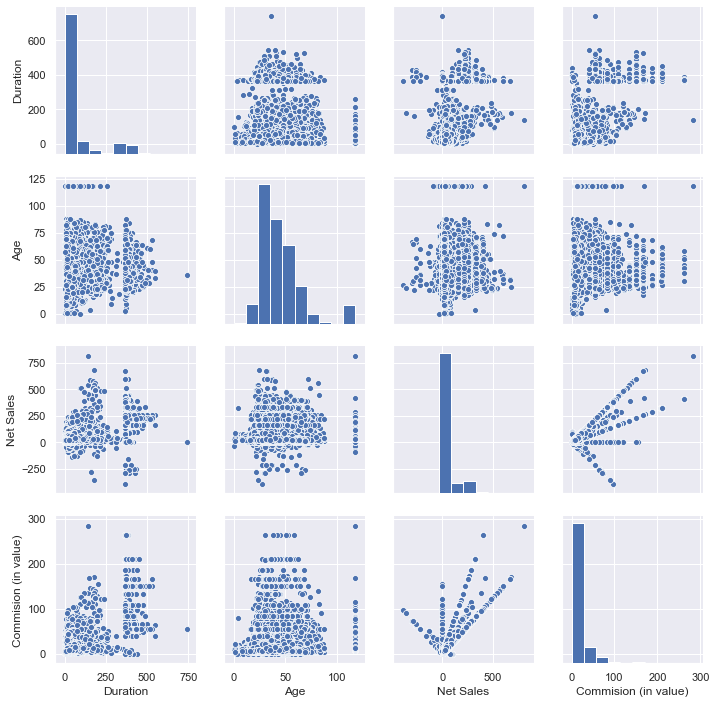

In [102]:
cols = ['Duration', 'Age', 'Net Sales', 
        'Commision (in value)'] 
ax = sns.pairplot(ti_2[cols], height = 2.5) 

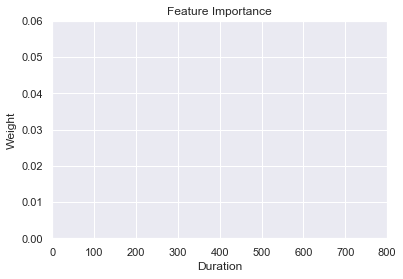

In [103]:
plt.xlabel('Duration') # labels the x axis

plt.ylabel('Weight') # labels the y axis

plt.title('Feature Importance') # labels the chart

plt.axis([0, 800, 0, 0.06]) # sets the axis limits for x and y axis

plt.grid(True) # Inserts grids 

plt.show() 

# KNN

In [81]:
X = ti_2.iloc[:, :-1].values
y = ti_2.iloc[:, -1].values

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [83]:
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

ann2 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
ann2.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=100,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alph

In [84]:
y_pred2 = ann2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

fpr, tpr, thresholds = roc_curve(y_test, y_pred2, pos_label=1)
print("AUC: ", auc(fpr, tpr))

Accuracy: 59.95%
AUC:  0.6007924643551783


In [85]:
print('Best parameters found:\n', ann2.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


In [86]:
scaler = preprocessing.MinMaxScaler().fit(X_train)

x_scaled = scaler.transform(X_train)

In [87]:
print(X_train[0:])
print(x_scaled[0:])

[[102.    30.    10.5  ...   0.     0.     0.  ]
 [ 33.    30.    10.5  ...   0.     0.     0.  ]
 [ 53.    16.     4.   ...   0.     0.     0.  ]
 ...
 [ 55.    18.     6.3  ...   0.     0.     1.  ]
 [  3.    18.     6.3  ...   0.     0.     0.  ]
 [ 11.    17.55   4.39 ...   0.     0.     0.  ]]
[[0.18943534 0.34945788 0.03703704 ... 0.         0.         0.        ]
 [0.06375228 0.34945788 0.03703704 ... 0.         0.         0.        ]
 [0.10018215 0.33778148 0.01410935 ... 0.         0.         0.        ]
 ...
 [0.10382514 0.33944954 0.02222222 ... 0.         0.         1.        ]
 [0.00910747 0.33944954 0.02222222 ... 0.         0.         0.        ]
 [0.02367942 0.33907423 0.01548501 ... 0.         0.         0.        ]]


In [88]:
parameter_space = {
    'hidden_layer_sizes': [50,50,50],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.05],
    'learning_rate': ['constant'],
}


ann3 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
ann3.fit(x_scaled, y_train)

C:\Users\theot\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=100,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.05],
  

In [89]:
y_pred3 = ann3.predict(scaler.transform(X_test))

accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

fpr, tpr, thresholds = roc_curve(y_test, y_pred3, pos_label=1)
print("AUC: ", auc(fpr, tpr))

Accuracy: 61.00%
AUC:  0.6122598897301119


In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1493 1177]
 [1170 1626]]
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      2670
           1       0.58      0.58      0.58      2796

    accuracy                           0.57      5466
   macro avg       0.57      0.57      0.57      5466
weighted avg       0.57      0.57      0.57      5466



In [93]:
error = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

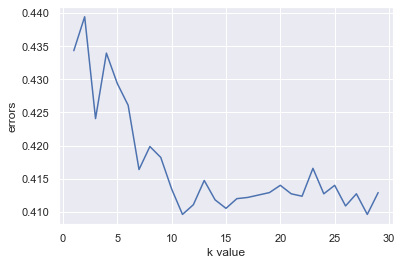

In [94]:
import seaborn as sns; sns.set()

sdf = pd.DataFrame(
    {'k value': list(range(1,30)),
     'errors': error
    })

ax = sns.lineplot(x="k value", y="errors", data=sdf)

In [105]:
ti.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [108]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null int64
Destination             63326 non-null object
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Gender                  18219 non-null object
Age                     63326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


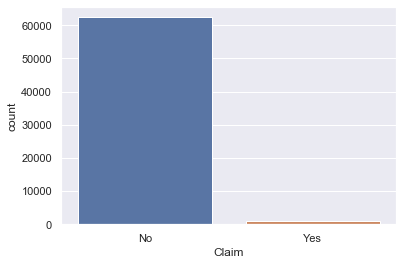

In [112]:
sns.countplot("Claim", data = ti)

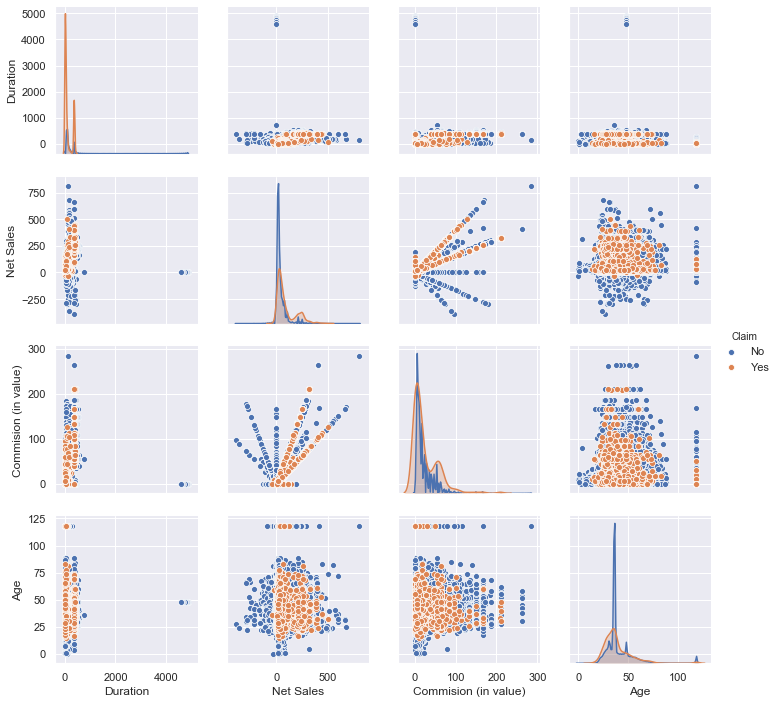

In [116]:
sns.pairplot(ti, hue="Claim")

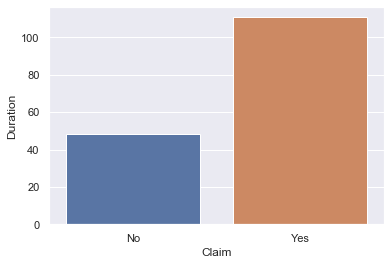

In [120]:
viz1 = sns.barplot(x="Claim", y="Duration", data=ti, ci=None)

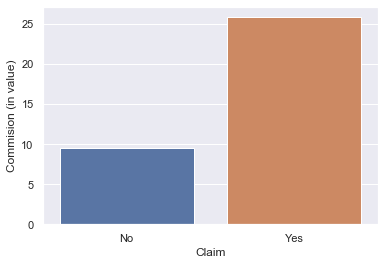

In [123]:
viz2 = sns.barplot(x="Claim", y="Commision (in value)", data=ti, ci=None)

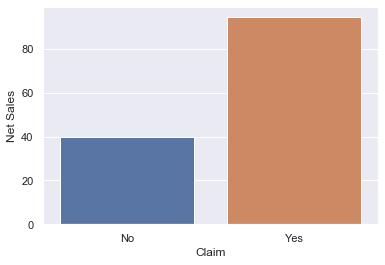

In [124]:
viz3 = sns.barplot(x="Claim", y="Net Sales", data=ti, ci=None)

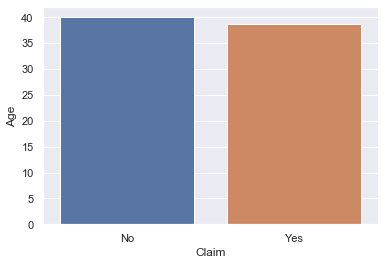

In [132]:
viz4 = sns.barplot(x="Claim", y="Age", data=ti, ci=None)

In [182]:
ti.drop(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender'], axis=1,inplace= True) 

In [183]:
ti.columns 

Index(['Claim', 'Age'], dtype='object')

In [184]:
ticlean= pd.get_dummies(ti)
ticlean.head()

,Age,Claim_No,Claim_Yes
0,81,1,0
1,71,1,0
2,32,1,0
3,32,1,0
4,41,1,0


In [152]:
from pandas import Series, DataFrame

In [194]:
bins = range(0,90,5)

age_groups = ticlean.groupby(pd.cut((ticlean).Age, bins))


In [195]:
age_effects = age_groups.Claim_No.mean()

In [196]:
age_effects

Age
(0, 5]      1.000000
(5, 10]     1.000000
(10, 15]    0.977778
(15, 20]    0.972752
(20, 25]    0.974883
(25, 30]    0.970022
(30, 35]    0.981302
(35, 40]    0.991356
(40, 45]    0.981971
(45, 50]    0.987457
(50, 55]    0.984626
(55, 60]    0.985677
(60, 65]    0.984638
(65, 70]    0.982864
(70, 75]    0.969620
(75, 80]    0.986928
(80, 85]    0.977011
Name: Claim_No, dtype: float64

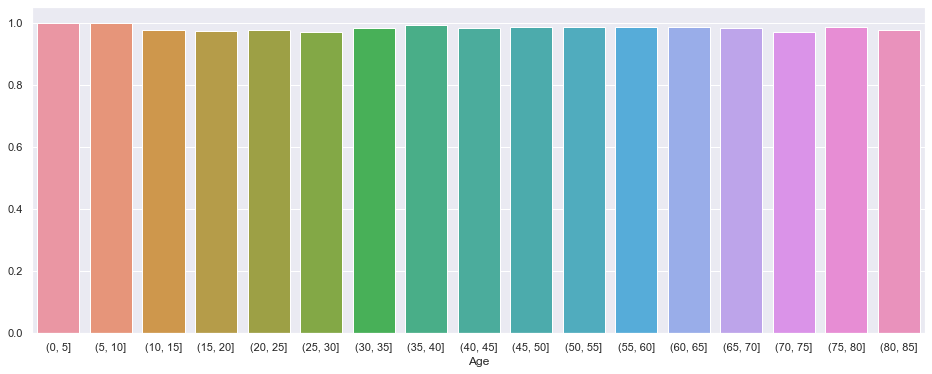

In [197]:
plt.figure(figsize=(16, 6))

viz5 = sns.barplot(x=age_effects.index, y=age_effects.values, ci=None)